# 仅包含最小修复后的 Python 代码（逐段可执行）

pandas 已安装
matplotlib 已安装
seaborn 已安装
numpy 已安装
中文字体启用： SimHei


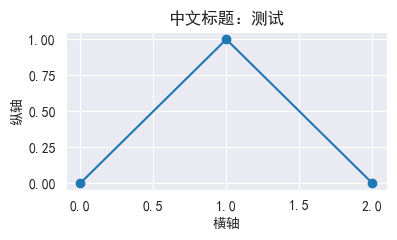

In [1]:
# ✓ 依赖安装 + Matplotlib 中文字体自动配置
import sys, subprocess

def ensure(pkg):
    try:
        __import__(pkg)
        print(f"{pkg} 已安装")
    except ImportError:
        print(f"正在安装 {pkg} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

for pkg in ("pandas", "matplotlib", "seaborn", "numpy"):
    ensure(pkg)

import os, urllib.request
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 1) 尝试使用常见中文字体
preferred = [
    "SimHei", "Microsoft YaHei", "PingFang SC", "Hiragino Sans GB",
    "Source Han Sans CN", "Source Han Sans SC", "Noto Sans CJK SC",
    "Noto Sans SC", "WenQuanYi Zen Hei", "Sarasa Gothic SC"
]
available = set(f.name for f in fm.fontManager.ttflist)
picked = None
for name in preferred:
    if name in available:
        picked = name
        break

# 2) 如无中文字体，自动下载 Noto Sans SC 并注册（需要外网）
if picked is None:
    print("未检测到本地中文字体，尝试下载 Noto Sans SC ...")
    url = "https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/SimplifiedChinese/NotoSansSC-Regular.otf"
    font_dir = Path.home() / ".local" / "share" / "fonts"
    font_dir.mkdir(parents=True, exist_ok=True)
    font_path = font_dir / "NotoSansSC-Regular.otf"
    if not font_path.exists():
        try:
            urllib.request.urlretrieve(url, font_path.as_posix())
            print("Noto Sans SC 下载完成")
        except Exception as e:
            print("字体下载失败：", e)
    # 运行时动态注册
    if font_path.exists():
        fm.fontManager.addfont(font_path.as_posix())
        matplotlib.rcParams['font.sans-serif'] = ["Noto Sans SC"]
        picked = "Noto Sans SC"

# 3) 配置 Matplotlib
if picked:
    matplotlib.rcParams['font.sans-serif'] = [picked]
matplotlib.rcParams['axes.unicode_minus'] = False
print("中文字体启用：", picked or "（未成功配置中文字体）")

# 小测试
import numpy as np
plt.figure(figsize=(4,2.5))
plt.title("中文标题：测试")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.plot([0,1,2],[0,1,0], "o-")
plt.tight_layout()
plt.show()


## Snippet 1

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.lr = learning_rate
        self.n_iter = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # 初始化权重和偏置
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # 感知器学习算法
        for _ in range(self.n_iter):
            for i, x_i in enumerate(X):
                # 1. 计算加权和与偏置
                linear_output = np.dot(x_i, self.weights) + self.bias
                # 2. 应用阶跃函数得到预测值
                y_predicted = 1 if linear_output >= 0 else 0
                # 3. 感知器更新规则
                update = self.lr * (y[i] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
        print("训练完成。")
        print(f"最终权重: {self.weights}")
        print(f"最终偏置: {self.bias}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted

# --- 训练并测试 ---
if __name__ == '__main__':
    # AND门的输入数据
    X_train = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ], dtype=float)

    # AND门的目标标签
    y_train = np.array([0, 0, 0, 1], dtype=int)
    
    perceptron_model = Perceptron(learning_rate=0.1, n_iterations=10)
    perceptron_model.fit(X_train, y_train)
    
    # 测试训练好的模型
    print("\n测试训练好的感知器:")
    test_inputs = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ], dtype=float)
    for test_input in test_inputs:
        prediction = perceptron_model.predict(test_input)
        print(f"输入: {test_input} -> 预测输出: {int(prediction)}")


训练完成。
最终权重: [0.2 0.1]
最终偏置: -0.20000000000000004

测试训练好的感知器:
输入: [0. 0.] -> 预测输出: 0
输入: [0. 1.] -> 预测输出: 0
输入: [1. 0.] -> 预测输出: 0
输入: [1. 1.] -> 预测输出: 1


## Snippet 2

In [3]:
import pandas as pd

# 示例：一个用于预测房价的简单数据集
data = {
    'SquareFootage': [1500, 2500, 1800, 3200],
    'NumBedrooms': [3, 4, 3, 5],
    'NumBathrooms': [2, 3, 2.5, 4],
    'AgeOfHouse': [10, 5, 15, 2],
    'HousePrice': [300000, 500000, 350000, 650000]  # 目标变量
}
df = pd.DataFrame(data)

# 将特征（X）与目标变量（y）分开
X = df.drop('HousePrice', axis=1)
y = df['HousePrice']

# 输入神经元的数量是 X 的列数
input_dimensions = X.shape[1]

print(f"特征: {list(X.columns)}")
print(f"特征数量: {X.shape}")
print(f"输入层神经元数量: {input_dimensions}")
print('✅ Snippet 2 executed')


特征: ['SquareFootage', 'NumBedrooms', 'NumBathrooms', 'AgeOfHouse']
特征数量: (4, 4)
输入层神经元数量: 4
✅ Snippet 2 executed


## Snippet 3

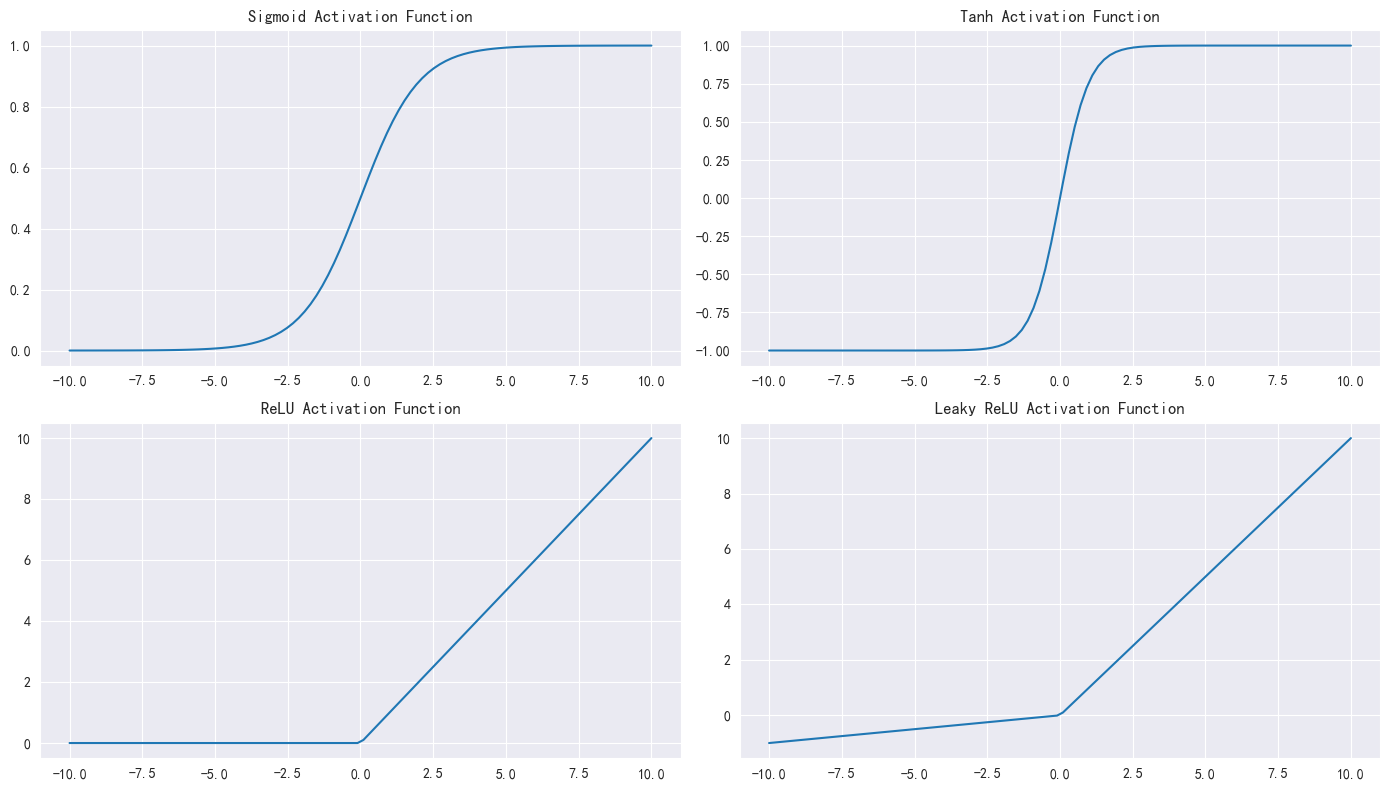

✅ Snippet 3 executed


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义输入范围
z = np.linspace(-10, 10, 100)

# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

# 绘制函数图像
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(z, sigmoid(z))
plt.title('Sigmoid Activation Function')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(z, tanh(z))
plt.title('Tanh Activation Function')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(z, relu(z))
plt.title('ReLU Activation Function')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(z, leaky_relu(z))
plt.title('Leaky ReLU Activation Function')
plt.grid(True)

plt.tight_layout()
plt.show()
print('✅ Snippet 3 executed')

## Snippet 4

In [5]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    """计算均方误差"""
    return np.mean((y_pred - y_true)**2)

def binary_cross_entropy(y_true, y_pred):
    """计算二元交叉熵"""
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 回归示例
true_price = np.array([300000, 500000, 350000])
predicted_price = np.array([320000, 480000, 340000])
mse_loss = mean_squared_error(true_price, predicted_price)
print(f"均方误差损失: {mse_loss:.2f}")

# 分类示例
true_label = np.array([1])              # 是欺诈
predicted_prob = np.array([0.99])       # 模型确信是欺诈
bce_loss = binary_cross_entropy(true_label, predicted_prob)
print(f"交叉熵损失 (正确): {bce_loss:.4f}")

true_label_2 = np.array([0])            # 非欺诈
predicted_prob_2 = np.array([0.95])     # 模型确信是欺诈
bce_loss_2 = binary_cross_entropy(true_label_2, predicted_prob_2)
print(f"交叉熵损失 (错误): {bce_loss_2:.4f}")

print('✅ Snippet 4 executed')


均方误差损失: 300000000.00
交叉熵损失 (正确): 0.0101
交叉熵损失 (错误): 2.9957
✅ Snippet 4 executed


## Snippet 5

In [7]:
import numpy as np

# 激活函数及其导数
def relu(x): return np.maximum(0, x)
def relu_derivative(x): return np.where(x > 0, 1, 0)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.Z1, self.A1, self.Z2, self.A2 = None, None, None, None
    
    def forward_pass(self, X):
        """前向传播"""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
        
    def compute_loss(self, y_true, y_pred):
        """计算损失（均方误差）"""
        return np.mean((y_pred - y_true)**2)
        
    def backward_pass(self, X, y_true, y_pred):
        """反向传播"""
        num_samples = X.shape[0]  # ✅ 修复点
        # 计算梯度
        error_output = y_pred - y_true
        dZ2 = error_output * sigmoid_derivative(self.Z2)
        self.dW2 = (1/num_samples) * np.dot(self.A1.T, dZ2)
        self.db2 = (1/num_samples) * np.sum(dZ2, axis=0, keepdims=True)
        
        error_hidden = np.dot(dZ2, self.W2.T)
        dZ1 = error_hidden * relu_derivative(self.Z1)
        self.dW1 = (1/num_samples) * np.dot(X.T, dZ1)
        self.db1 = (1/num_samples) * np.sum(dZ1, axis=0, keepdims=True)
        
    def update_parameters(self):
        """更新参数"""
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2
        
    def train(self, X, y, epochs=10000):
        """训练网络"""
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)
            loss = self.compute_loss(y, y_pred)
            self.backward_pass(X, y, y_pred)
            self.update_parameters()
            
            if (epoch + 1) % 1000 == 0:
                print(f"轮次 {epoch + 1}/{epochs}, 损失: {loss:.6f}")

# ✅ 准备 AND 门训练数据
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_train = np.array([[0], [0], [0], [1]])

nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)
nn.train(X_train, y_train, epochs=5000)
print('✅ Snippet 5 executed')


轮次 1000/5000, 损失: 0.002111
轮次 2000/5000, 损失: 0.000903
轮次 3000/5000, 损失: 0.000569
轮次 4000/5000, 损失: 0.000414
轮次 5000/5000, 损失: 0.000324
✅ Snippet 5 executed


## Snippet 6

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 生成合成交易数据
np.random.seed(42)
# 合法交易
X_legit = np.random.normal(loc=0, scale=1, size=(10000, 10))
y_legit = np.zeros(10000)
# 欺诈交易
X_fraud = np.random.normal(loc=1, scale=1.5, size=(500, 10))
y_fraud = np.ones(500)

# 合并并打乱数据
X = np.vstack((X_legit, X_fraud))
y = np.hstack((y_legit, y_fraud))
p = np.random.permutation(X.shape[0])   # ✅ 只取样本数
X, y = X[p], y[p]

# 2. 预处理数据
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. 构建并训练神经网络
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=50,
    random_state=42,
    verbose=False
)
mlp.fit(X_train, y_train)

# 4. 评估模型
y_pred = mlp.predict(X_test)
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=['合法 (0)', '欺诈 (1)']))
print('✅ Snippet 6 executed')


混淆矩阵:
[[1995    5]
 [  28   72]]

分类报告:
              precision    recall  f1-score   support

      合法 (0)       0.99      1.00      0.99      2000
      欺诈 (1)       0.94      0.72      0.81       100

    accuracy                           0.98      2100
   macro avg       0.96      0.86      0.90      2100
weighted avg       0.98      0.98      0.98      2100

✅ Snippet 6 executed


D:\Study\deeplearning\Anaconda3\envs\bookcode\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## Snippet 7

In [9]:
from textblob import TextBlob

reviews = [
    "This new phone is absolutely amazing! The camera is incredible.",
    "I'm really disappointed with this purchase. The screen cracked.",
    "The shipping was fast and the product arrived as described.",
    "A total waste of money. It stopped working after two days."
]

for i, review in enumerate(reviews):
    blob = TextBlob(review)
    # 获取情感极性
    polarity = blob.sentiment.polarity
    print(f"评论 {i+1}: 极性 = {polarity:.2f}")
    if polarity > 0.1:
        print(" - 情感: 正面")
    elif polarity < -0.1:
        print(" - 情感: 负面")
    else:
        print(" - 情感: 中性")
print('✅ Snippet 7 executed')

评论 1: 极性 = 0.60
 - 情感: 正面
评论 2: 极性 = -0.75
 - 情感: 负面
评论 3: 极性 = 0.20
 - 情感: 正面
评论 4: 极性 = -0.10
 - 情感: 中性
✅ Snippet 7 executed


## Snippet 8

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. 数据加载和预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. 构建 CNN 模型（自动推断 flatten_dim，避免尺寸不匹配）
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)

        # 🔧 动态计算展平后的维度，避免手算出错
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            x = F.relu(self.conv1(dummy))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = F.relu(self.conv3(x))
            flatten_dim = x.view(1, -1).size(1)

        self.fc1 = nn.Linear(flatten_dim, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))    # [B,32,26,26]
        x = self.pool1(x)            # [B,32,13,13]
        x = F.relu(self.conv2(x))    # [B,64,11,11]
        x = self.pool2(x)            # [B,64,5,5]
        x = F.relu(self.conv3(x))    # [B,64,3,3]
        x = x.view(x.size(0), -1)    # ✅ 保留 batch 维度
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# 3. 定义优化器和损失函数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 训练与验证（含训练/验证准确率）
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss, running_corrects, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_corrects += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = running_corrects / total

    # 验证集准确率
    model.eval()
    correct, total_val = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total_val

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

print("✅ Snippet 8 executed (PyTorch version with Acc)")


Epoch [1/10], Train Loss: 0.5633, Train Acc: 0.7948, Val Acc: 0.8459
Epoch [2/10], Train Loss: 0.3528, Train Acc: 0.8731, Val Acc: 0.8761
Epoch [3/10], Train Loss: 0.2986, Train Acc: 0.8913, Val Acc: 0.8876
Epoch [4/10], Train Loss: 0.2633, Train Acc: 0.9026, Val Acc: 0.8949
Epoch [5/10], Train Loss: 0.2405, Train Acc: 0.9119, Val Acc: 0.9020
Epoch [6/10], Train Loss: 0.2203, Train Acc: 0.9205, Val Acc: 0.8985
Epoch [7/10], Train Loss: 0.2024, Train Acc: 0.9254, Val Acc: 0.9056
Epoch [8/10], Train Loss: 0.1868, Train Acc: 0.9309, Val Acc: 0.9072
Epoch [9/10], Train Loss: 0.1752, Train Acc: 0.9355, Val Acc: 0.9099
Epoch [10/10], Train Loss: 0.1585, Train Acc: 0.9421, Val Acc: 0.9077
✅ Snippet 8 executed (PyTorch version with Acc)


## Snippet 9

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import os

# 1) 仅本地读取
file_path = "shakespeare.txt"

def load_text_local(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(
            f"未找到本地语料文件：{file_path}\n"
            f"请将 shakespeare.txt 放到当前目录后重试。"
        )
    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
        return f.read()

text = load_text_local(file_path)

# 2) 构建字典与数字序列
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = {i: u for i, u in enumerate(vocab)}
text_as_int = [char2idx[c] for c in text]

# 3) Dataset 与 DataLoader
class CharDataset(Dataset):
    def __init__(self, data, seq_length=100):
        self.data = data
        self.seq_length = seq_length
    def __len__(self):
        return len(self.data) - self.seq_length
    def __getitem__(self, idx):
        chunk = self.data[idx:idx + self.seq_length + 1]
        input_seq = torch.tensor(chunk[:-1], dtype=torch.long)
        target_seq = torch.tensor(chunk[1:], dtype=torch.long)
        return input_seq, target_seq

seq_length = 100
dataset = CharDataset(text_as_int, seq_length)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, drop_last=True)

# 4) LSTM 模型
class CharLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=256, hidden_size=1024, num_layers=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

vocab_size = len(vocab)
embedding_dim = 256
hidden_size = 1024
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CharLSTM(vocab_size, embedding_dim, hidden_size).to(device)

# 5) 训练配置
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 6) 训练（示例：2 个 epoch）
epochs = 2
for epoch in range(epochs):
    hidden = None
    total_loss = 0.0
    for batch, (inp, target) in enumerate(dataloader):
        inp, target = inp.to(device), target.to(device)
        optimizer.zero_grad()
        output, hidden = model(inp, hidden)
        loss = criterion(output.view(-1, vocab_size), target.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        # 断开隐藏状态计算图，防止跨 batch 梯度累积
        hidden = tuple(h.detach() for h in hidden)
        if (batch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}, Step {batch+1}, Loss: {loss.item():.4f}")
    print(f"Epoch {epoch+1} finished. Avg Loss: {total_loss/len(dataloader):.4f}")

print("✅ Snippet 9 executed (PyTorch, local file only)")


Epoch 1, Step 100, Loss: 1.8601
Epoch 1, Step 200, Loss: 1.6556
Epoch 1, Step 300, Loss: 1.5019
Epoch 1, Step 400, Loss: 1.4596
Epoch 1, Step 500, Loss: 1.3660
Epoch 1, Step 600, Loss: 1.3560
Epoch 1, Step 700, Loss: 1.3863
Epoch 1, Step 800, Loss: 1.2849
Epoch 1, Step 900, Loss: 1.3163
Epoch 1, Step 1000, Loss: 1.2921
Epoch 1, Step 1100, Loss: 1.2256
Epoch 1, Step 1200, Loss: 1.2504
Epoch 1, Step 1300, Loss: 1.2063
Epoch 1, Step 1400, Loss: 1.2200
Epoch 1, Step 1500, Loss: 1.1524
Epoch 1, Step 1600, Loss: 1.1905
Epoch 1, Step 1700, Loss: 1.1818
Epoch 1, Step 1800, Loss: 1.1564
Epoch 1, Step 1900, Loss: 1.1078
Epoch 1, Step 2000, Loss: 1.1088
Epoch 1, Step 2100, Loss: 1.0823
Epoch 1, Step 2200, Loss: 1.0418
Epoch 1, Step 2300, Loss: 0.9890
Epoch 1, Step 2400, Loss: 1.0645
Epoch 1, Step 2500, Loss: 1.0762
Epoch 1, Step 2600, Loss: 1.0190
Epoch 1, Step 2700, Loss: 0.9815
Epoch 1, Step 2800, Loss: 0.9574
Epoch 1, Step 2900, Loss: 0.9740
Epoch 1, Step 3000, Loss: 0.9606
Epoch 1, Step 3100,

✅ 读取完成
✅ 预处理完成，X_train 形状： (640, 45)
Epoch 01/20 | Train Loss 0.6875 Acc 0.5484 | Val Loss 0.6674 Acc 0.6125
Epoch 02/20 | Train Loss 0.6614 Acc 0.6109 | Val Loss 0.6467 Acc 0.6188
Epoch 03/20 | Train Loss 0.6400 Acc 0.6375 | Val Loss 0.6292 Acc 0.6625
Epoch 04/20 | Train Loss 0.6158 Acc 0.6813 | Val Loss 0.6154 Acc 0.6813
Epoch 05/20 | Train Loss 0.5986 Acc 0.6953 | Val Loss 0.6077 Acc 0.6875
Epoch 06/20 | Train Loss 0.5963 Acc 0.6766 | Val Loss 0.6042 Acc 0.7000
Epoch 07/20 | Train Loss 0.5838 Acc 0.6906 | Val Loss 0.6021 Acc 0.6937
Epoch 08/20 | Train Loss 0.5742 Acc 0.7063 | Val Loss 0.5984 Acc 0.7063
Epoch 09/20 | Train Loss 0.5729 Acc 0.7141 | Val Loss 0.5955 Acc 0.7063
Epoch 10/20 | Train Loss 0.5649 Acc 0.7125 | Val Loss 0.5952 Acc 0.7000
Epoch 11/20 | Train Loss 0.5539 Acc 0.7234 | Val Loss 0.5939 Acc 0.7188
Epoch 12/20 | Train Loss 0.5522 Acc 0.7250 | Val Loss 0.5982 Acc 0.6750
Epoch 13/20 | Train Loss 0.5427 Acc 0.7422 | Val Loss 0.5912 Acc 0.7188
Epoch 14/20 | Train Loss 0.

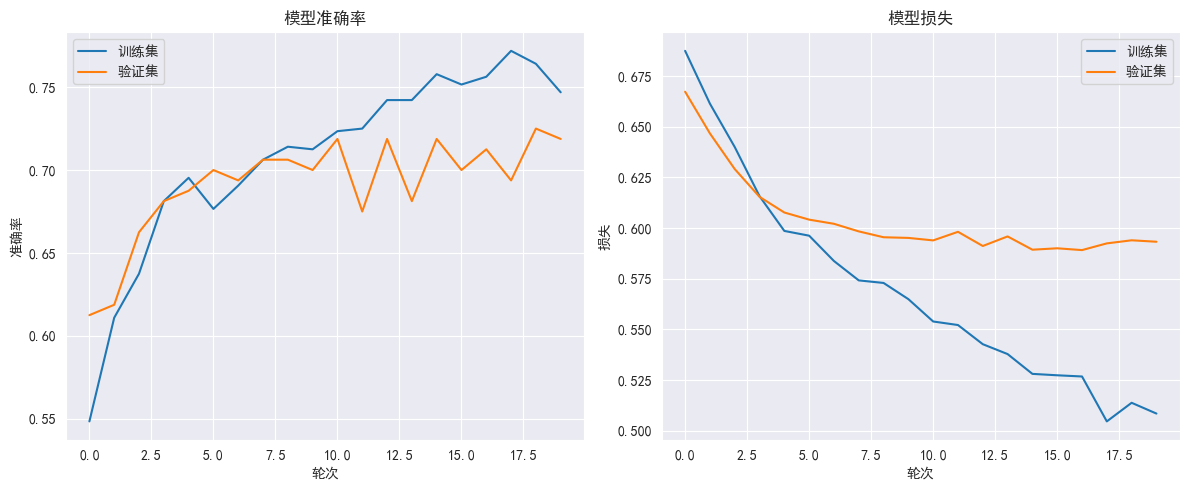

✅ 全流程完成（PyTorch 版）


In [12]:
# Telco Churn - PyTorch 版（与 Keras 流程等价）
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# ========= 0) 设备 & 随机种子 =========
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ========= 1) 读取与清洗 =========
csv_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(
        f"未找到文件 {csv_path}，请将 CSV 放到当前目录或修改 csv_path。"
    )

df = pd.read_csv(csv_path)
print("✅ 读取完成")

# 将 'TotalCharges' 转为数值（无法转换的置为 NaN），再丢弃缺失
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 删除无用 ID 列；目标变量转 0/1
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# ========= 2) 特征/标签、预处理器 =========
X = df.drop('Churn', axis=1)
y = df['Churn'].astype(int).values

# 数值/类别列
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# 预处理器：数值标准化 + 类别独热
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ========= 3) 切分、拟合转换 =========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed, stratify=y
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

# 稀疏 -> 稠密（兼容不同 sklearn 版本）
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()
    X_test_processed  = X_test_processed.toarray()

print("✅ 预处理完成，X_train 形状：", X_train_processed.shape)

# ========= 4) 转 Tensor & DataLoader =========
X_train_t = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_t  = torch.tensor(X_test_processed,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).view(-1, 1)

batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_test_t,  y_test_t),  batch_size=batch_size, shuffle=False)

# ========= 5) 定义模型（与 Keras 结构对应：64→32→1） =========
class ChurnMLP(nn.Module):
    def __init__(self, d_in):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_in, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # 不加 Sigmoid，后面用 BCEWithLogitsLoss
        )
    def forward(self, x):
        return self.net(x)

model = ChurnMLP(X_train_t.shape[1]).to(device)

# ========= 6) 损失 & 优化器 =========
criterion = nn.BCEWithLogitsLoss()          # 等价于 Keras 的 binary_crossentropy(from_logits=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ========= 7) 训练循环（记录 loss/acc，类似 Keras 的 history） =========
epochs = 20
hist = {"loss": [], "val_loss": [], "acc": [], "val_acc": []}

def batch_acc(logits, y_true):
    prob = torch.sigmoid(logits)
    pred = (prob >= 0.5).float()
    return (pred.eq(y_true).float().mean()).item()

for ep in range(1, epochs+1):
    # ---- train ----
    model.train()
    tr_loss, tr_correct, tr_count = 0.0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        tr_loss += loss.item() * xb.size(0)
        tr_correct += int((torch.sigmoid(logits).detach() >= 0.5).eq(yb).sum().item())
        tr_count  += xb.size(0)
    ep_loss = tr_loss / tr_count
    ep_acc  = tr_correct / tr_count

    # ---- validate ----
    model.eval()
    va_loss, va_correct, va_count = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            va_loss += loss.item() * xb.size(0)
            va_correct += int((torch.sigmoid(logits) >= 0.5).eq(yb).sum().item())
            va_count  += xb.size(0)
    ep_val_loss = va_loss / va_count
    ep_val_acc  = va_correct / va_count

    hist["loss"].append(ep_loss)
    hist["val_loss"].append(ep_val_loss)
    hist["acc"].append(ep_acc)
    hist["val_acc"].append(ep_val_acc)

    print(f"Epoch {ep:02d}/{epochs} | "
          f"Train Loss {ep_loss:.4f} Acc {ep_acc:.4f} | "
          f"Val Loss {ep_val_loss:.4f} Acc {ep_val_acc:.4f}")

# ========= 8) 测试评估（分类报告） =========
model.eval()
with torch.no_grad():
    logits = model(X_test_t.to(device))
    prob = torch.sigmoid(logits).cpu().numpy().ravel()
y_pred = (prob >= 0.5).astype(np.int32)

print("\n测试集准确率: %.4f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['未流失 (0)', '流失 (1)']))

# ========= 9) 训练曲线（仿 Keras history） =========
def plot_history(hist):
    plt.figure(figsize=(12,5))
    # acc
    plt.subplot(1,2,1)
    plt.plot(hist["acc"], label="训练集")
    plt.plot(hist["val_acc"], label="验证集")
    plt.title("模型准确率"); plt.xlabel("轮次"); plt.ylabel("准确率"); plt.legend()
    # loss
    plt.subplot(1,2,2)
    plt.plot(hist["loss"], label="训练集")
    plt.plot(hist["val_loss"], label="验证集")
    plt.title("模型损失"); plt.xlabel("轮次"); plt.ylabel("损失"); plt.legend()
    plt.tight_layout(); plt.show()

plot_history(hist)
print("✅ 全流程完成（PyTorch 版）")


测试准确率: 0.7188
              precision    recall  f1-score   support

     未流失 (0)       0.68      0.61      0.64        66
      流失 (1)       0.74      0.80      0.77        94

    accuracy                           0.72       160
   macro avg       0.71      0.70      0.70       160
weighted avg       0.72      0.72      0.72       160



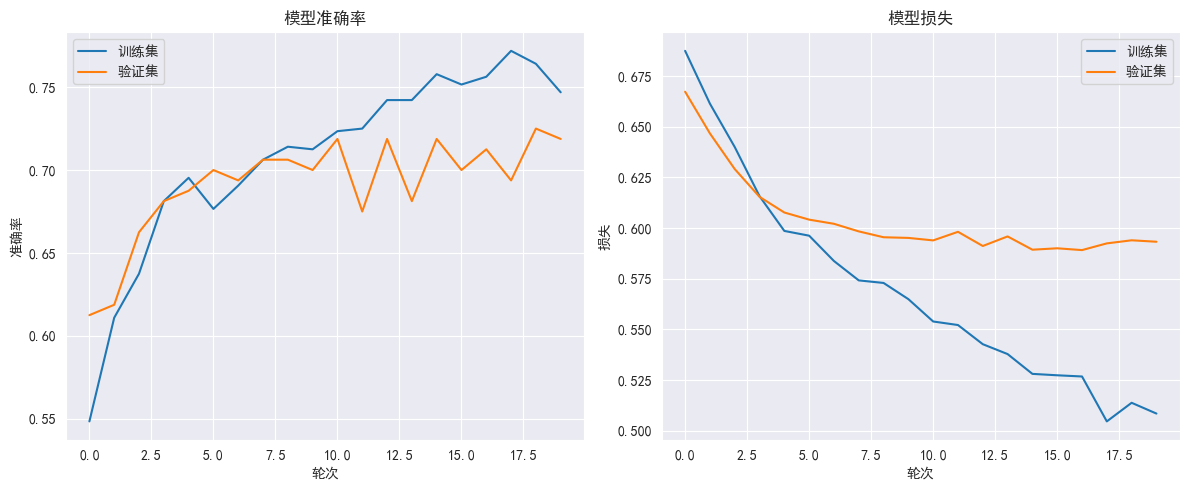

✅ Snippet 16 executed (PyTorch)


In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# ===== 测试集评估（PyTorch） =====
model.eval()
with torch.no_grad():
    logits = model(X_test_t.to(device))             # (N, 1)
    prob = torch.sigmoid(logits).cpu().numpy().ravel()
y_pred_class = (prob > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred_class)
print(f"测试准确率: {acc:.4f}")

print(classification_report(
    y_test, y_pred_class,
    target_names=['未流失 (0)', '流失 (1)']
))

# ===== 训练曲线绘制（对应 Keras 的 history） =====
def plot_history_torch(hist):
    """
    hist 需包含:
      - hist['accuracy'] 或 hist['acc']         训练准确率
      - hist['val_accuracy'] 或 hist['val_acc'] 验证准确率
      - hist['loss']                              训练损失
      - hist['val_loss']                          验证损失
    """
    # 兼容两种命名
    acc = hist.get("accuracy", hist.get("acc", []))
    val_acc = hist.get("val_accuracy", hist.get("val_acc", []))
    loss = hist.get("loss", [])
    val_loss = hist.get("val_loss", [])

    plt.figure(figsize=(12, 5))

    # 准确率
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='训练集')
    plt.plot(val_acc, label='验证集')
    plt.title('模型准确率'); plt.xlabel('轮次'); plt.ylabel('准确率'); plt.legend()

    # 损失
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='训练集')
    plt.plot(val_loss, label='验证集')
    plt.title('模型损失'); plt.xlabel('轮次'); plt.ylabel('损失'); plt.legend()

    plt.tight_layout(); plt.show()

plot_history_torch(hist)
print('✅ Snippet 16 executed (PyTorch)')


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# 1. 生成并准备数据
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 2. 构建带Dropout的模型
model_with_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5), # 添加Dropout层
    Dense(64, activation='relu'),
    Dropout(0.3), # 添加另一个Dropout层
    Dense(1, activation='sigmoid')
])
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. 实现提前终止并训练
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history = model_with_dropout.fit(X_train, y_train,
                                 epochs=200,
                                 batch_size=32,
                                 validation_data=(X_val, y_val),
                                 callbacks=[early_stopping_callback],
                                 verbose=0) # 设置verbose=0以简化输出

# 4. 评估最终模型
final_loss, final_accuracy = model_with_dropout.evaluate(X_test, y_test)
print(f"最终测试集准确率: {final_accuracy:.4f}")
print('✅ Snippet 17 executed')

D:\Study\deeplearning\Anaconda3\envs\bookcode\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.3144 
最终测试集准确率: 0.8950
✅ Snippet 17 executed
